# 5.4 Training and Test Errors

So far, we have fit regression models to data and obtained predictions from them, but we have not evaluated whether these predictions were any good. In this lesson, we will discuss different performance metrics that can be used to evaluate predictions from a machine learning model. These performance metrics can be calculated on training data or on test data.

In [1]:
import pandas as pd
import numpy as np

# Extract the training data.
data_dir = "https://dlsun.github.io/pods/data/"
bordeaux_df = pd.read_csv(data_dir + "bordeaux.csv",
                          index_col="year")
bordeaux_train = bordeaux_df.loc[:1980].copy()
bordeaux_train["log(price)"] = np.log(bordeaux_train["price"])

## Performance Metrics for Regression Models

To evaluate the performance of a regression model, we check the predicted labels from the model against the true labels. Since the labels are quantitative, all of the performance metrics are based on the difference between each predicted label $\hat y$ and the true label $y$. 

One way to make sense of these differences is to square each difference and average the squared differences. This measure of error is known as _mean squared error_ (or _MSE_, for short):

$$ 
\begin{align*}
\textrm{MSE} &= \textrm{mean of } (y - \hat y)^2.
\end{align*}
$$ 

MSE is difficult to interpret because its units are the square of the units of the label. To make MSE more interpretable, it is common to take the _square root_ of the MSE to obtain the _root mean squared error_ (or _RMSE_, for short):

$$ 
\begin{align*}
\textrm{RMSE} &= \sqrt{\textrm{MSE}}.
\end{align*}
$$ 

The RMSE measures how off a "typical" prediction is. Notice that this reasoning is exactly the same reasoning that we used in Chapter 3 when we defined the standard deviation as the square root of the variance.

Another common measure of error is the _mean absolute error_ (or _MAE_, for short):

$$ 
\begin{align*}
\textrm{MAE} &= \textrm{mean of } |y - \hat y|.
\end{align*}
$$ 

Like the RMSE, the MAE measures how off a "typical" prediction is. 

MSE, RMSE, and MAE are all error metrics; we want them to be as small as possible. There are also performance metrics that we seek to maximize. One example is $R^2$, also known as the _coefficient of determination_:

\begin{align*}
R^2 &= 1 - \frac{\text{mean of } (y - \hat y)^2}{\text{mean of } (y - \bar y)^2}.
\end{align*}

Notice that the denominator, $\text{mean of } (y - \bar y)^2$, is just the variance of the label $y$. So the interpretation of $\frac{\text{mean of } (y - \hat y)^2}{\text{mean of } (y - \bar y)^2}$ is the fraction of the variance in the label $y$ that is "left over" after we fit the regression model. Therefore, $R^2$ can be interpreted as the fraction of variance that is explained by the regression model. It cannot be greater than $1.0$, but it can sometimes be negative if the regression model is worse than useless.

These are just some of the performance metrics that are used to evaluate regression models. For more, refer to the [scikit-learn documentation on regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

## Training Error

To calculate the performance metrics above, we need data where the true labels are known. Where do we find such data? One natural source of labeled data is the training data, since we needed the true labels to be able to train a model.

For a $k$-nearest neighbors model, the training data is the data from which the $k$-nearest neighbors are selected. So to calculate the training RMSE, we do the following:

For each observation in the training data:
1. Find its $k$-nearest neighbors in the training data.
2. Average the labels of the $k$-nearest neighbors to obtain the predicted label.
3. Compare the predicted label to the true label.

At this point, we can average the square of these differences to obtain the MSE or average their absolute values to obtain the MAE.

Let's calculate the training MSE for the 5-nearest neighbors model that we fit in Chapter 5.2.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

X_train = bordeaux_train[["win", "summer"]]
y_train = bordeaux_train["log(price)"]

pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=5)
)

pipeline.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

To calculate the training error, we need its predictions on the training data.

In [3]:
# Calculate the model predictions on the training data.
y_train_ = pipeline.predict(X=X_train)
y_train_

array([3.56069882, 3.38240361, 3.66085388, 2.70065469, 2.77198968,
       3.4843538 , 3.19493478, 3.76968555, 3.25353221, 2.5331913 ,
       3.4843538 , 2.51412926, 3.19493478, 3.08407263, 2.56202526,
       2.951578  , 3.32169799, 3.33549657, 2.6527587 , 3.4843538 ,
       2.56202526, 3.29634765, 3.4843538 , 2.86435018, 2.86435018,
       3.08407263, 2.6316866 ])

Finally, we compare the predictions `y_train_` (note the trailing underscore) to the true labels `y_train`, which are known, since this is the training data.

In [4]:
# Calculate the mean-squared error.
mse = ((y_train - y_train_) ** 2).mean()
mse

0.16338631596342398

We could have also used a scikit-learn function to calculate mean-squared error. The scikit-learn functions for the performance metrics discussed in this chapter are shown in the table below. All of these functions take a 1D-array of the true labels as the first parameter and a 1D-array of the predicted labels as the second.

| Metric | Function Name |
|--------|---------------|
| MSE | `mean_squared_error` |
| MAE | `mean_absolute_error` |
| $R^2$ | `r2_score` |

In [5]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_)

0.16338631596342398

To obtain a measure of error that is more interpretable, we can take the square root to obtain the RMSE.

In [6]:
rmse = np.sqrt(mse)
rmse

0.4042107321230152

The RMSE says that the model's predictions are off by about 0.4 on average. This is not too bad, since vintage quality ranges from 2.0 to 5.0.

## Overfitting and Test Error

Training error is not a great measure of the quality of a model. To see why, consider a 1-nearest neighbor regression model. Before you read on, can you guess what the training error of a 1-nearest neighbor regression model will be?

In [7]:
# Fit a 1-nearest neighbors model.
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train, y_train)

# Calculate the model predictions on the training data.
y_train_ = model.predict(X_train)

# Calculate the MSE
mean_squared_error(y_train, y_train_)

0.0

The training error of this model seems too good to be true. Can our model really have an error of $0.0$? The reason, of course, is that the nearest neighbor to any observation in the training data is the observation itself!

Ultimately, the goal of a machine learning model is to make predictions on *future* data. Therein lies the problem with training error. Training error measures how well a model does on the current data. It is possible to build a model that _overfits_ to the training data---that is, a model that fits so well to the current data that it does poorly on future data.

For example, consider fitting two different models to the 10 training observations shown below. The model represented by the red line actually passes through every observation (that is, its training error is zero). However, most people would prefer the model represented by the blue line. If one had to make a prediction for the label when $x = 0.8$, the value of the blue line is intuitively more plausible than the value of the red line, which is out of step with the nearby points.

![](https://github.com/dlsun/pods/blob/master/05-Regression-Models/overfitting.png?raw=1)

To make a case for the blue model using mean-squared error, we would need future, or test, data. The red model is as good as it gets when it comes to the training data.

The prediction error on future data is also known as _test error_. But to calculate the test error, we need _labeled_ future data. In many applications, data is hard to collect and _labeled_ data is harder still. In the next lesson, we discuss strategies for approximating the test error using only the training data that we aleady have.

# Exercises

1\. Calculate the training coefficient of determination ($R^2$) of the $10$-nearest neighbors regression model that we fit in the lesson of Chapter 5.3 to the Ames housing data set (http://dlsun.github.io/pods/data/AmesHousing.txt ).

In [8]:
ames = pd.read_table("http://dlsun.github.io/pods/data/AmesHousing.txt")
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

ct = make_column_transformer(
    (StandardScaler(), ["Gr Liv Area", "Bedroom AbvGr", "Full Bath"]),
    (OneHotEncoder(), ["Neighborhood", "Bldg Type"]),
    remainder="drop"
)

from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=10)
)

X_train = ames[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Neighborhood", "Bldg Type"]]
y_train = ames["SalePrice"]

pipeline.fit(X=X_train, y=y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Gr Liv Area',
                                                   'Bedroom AbvGr',
                                                   'Full Bath']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Neighborhood',
                                                   'Bldg Type'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=10))])

In [10]:
from sklearn.metrics import r2_score

y_pred = pipeline.predict(X_train)
r2_score(y_train, y_pred)

0.8208718803145867

2\. Using the Tips data set (http://dlsun.github.io/pods/data/tips.csv ), train $k$-nearest neighbors regression models to predict the tip, for several different values of $k$. Calculate the training MAE of each model and make a graph showing this training error as a function of $k$.

In [11]:
tips = pd.read_csv("http://dlsun.github.io/pods/data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
ct = make_column_transformer(
    (OneHotEncoder(), ["sex", "day"]),
    (StandardScaler(), ["total_bill", "size"]),
    remainder="drop"
)

X_train = tips[["total_bill", "size", "sex", "day"]]
y_train = tips["tip"]

In [14]:
from sklearn.metrics import mean_absolute_error

maes = {}
for k in range (1, 20):
  pipeline = make_pipeline(
      ct,
      KNeighborsRegressor(n_neighbors=k)
  )

  pipeline.fit(X=X_train,
               y=y_train)
  
  y_pred = pipeline.predict(X_train)
  
  maes[k] = mean_absolute_error(y_train, y_pred)

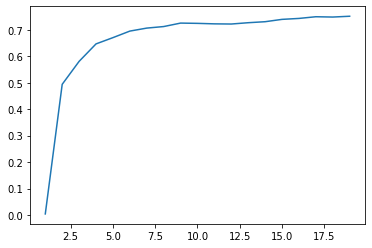

In [15]:
pd.Series(maes).plot.line()